In [485]:
import pyvista as pv
import numpy as np
pv.set_jupyter_backend('static')

fluid = pv.read('/Users/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_N200/20/SU2/outputs/fluid.vtk')


In [486]:
solid = pv.read('/Users/ppiper/Dropbox/local/ihtc_nozzle/data/doe_lhs_N200/20/SU2/outputs/solid.vtk')


In [487]:
edges = solid.extract_feature_edges()
edges

PolyData (0x48d02ee60)
  N Cells:    478
  N Points:   478
  N Strips:   0
  X Bounds:   1.245e-03, 1.504e-01
  Y Bounds:   2.291e-02, 7.269e-02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   3

In [488]:

indices_para_manter = np.where((edges.points[:, 0] > edges.points[:, 0].min()) & (edges.points[:, 0] < edges.points[:, 0].max()))[0]
inner_points = edges.points[indices_para_manter]
inner_scalars = edges['Temperature'][indices_para_manter]

upper_points = inner_points[1::2,:]
upper_scalars = inner_scalars[1::2]

lower_points = inner_points[::2,:]
lower_scalars = inner_scalars[::2]


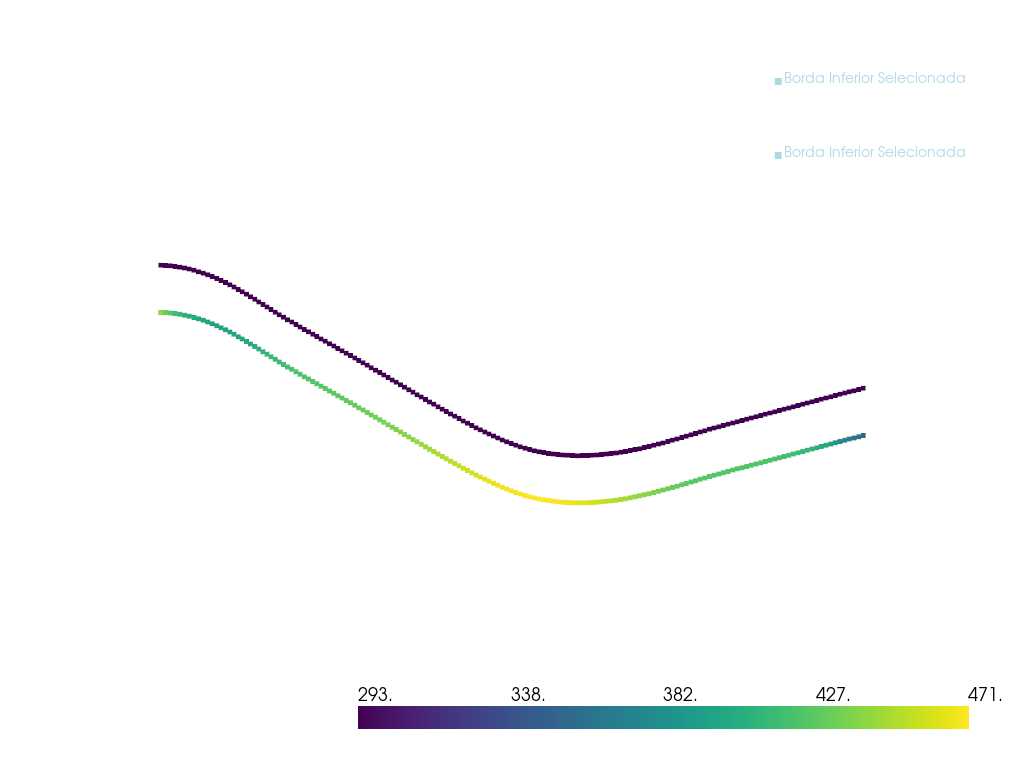

In [489]:
import numpy as np

plotter = pv.Plotter()

plotter.add_points(
    lower_points,
    scalars=lower_scalars,
    label='Borda Inferior Selecionada',
    #render_points_as_spheres=True,
    #point_size=20,
    #stitle='Temperature (K)'  # Título da barra de cores
)

plotter.add_points(
    upper_points,
    scalars=upper_scalars,
    label='Borda Inferior Selecionada',
    #render_points_as_spheres=True,
    #point_size=20,
    #stitle='Temperature (K)'  # Título da barra de cores
)


plotter.view_xy()
plotter.add_legend()
plotter.show()

In [490]:
def view_as_structured(arr):
    # A verificação de contiguidade garante que a "view" funcione corretamente
    arr = np.ascontiguousarray(arr) 
    # dtype='V' + str(arr.dtype.itemsize * arr.shape[1])
    # cria um tipo de dado "void" do tamanho de uma linha inteira.
    void_type = np.dtype((np.void, arr.dtype.itemsize * arr.shape[1]))
    return arr.view(void_type)


A_view = view_as_structured(fluid.points)
B_view = view_as_structured(lower_points)

_, indices_A, indices_B = np.intersect1d(A_view, B_view, return_indices=True)

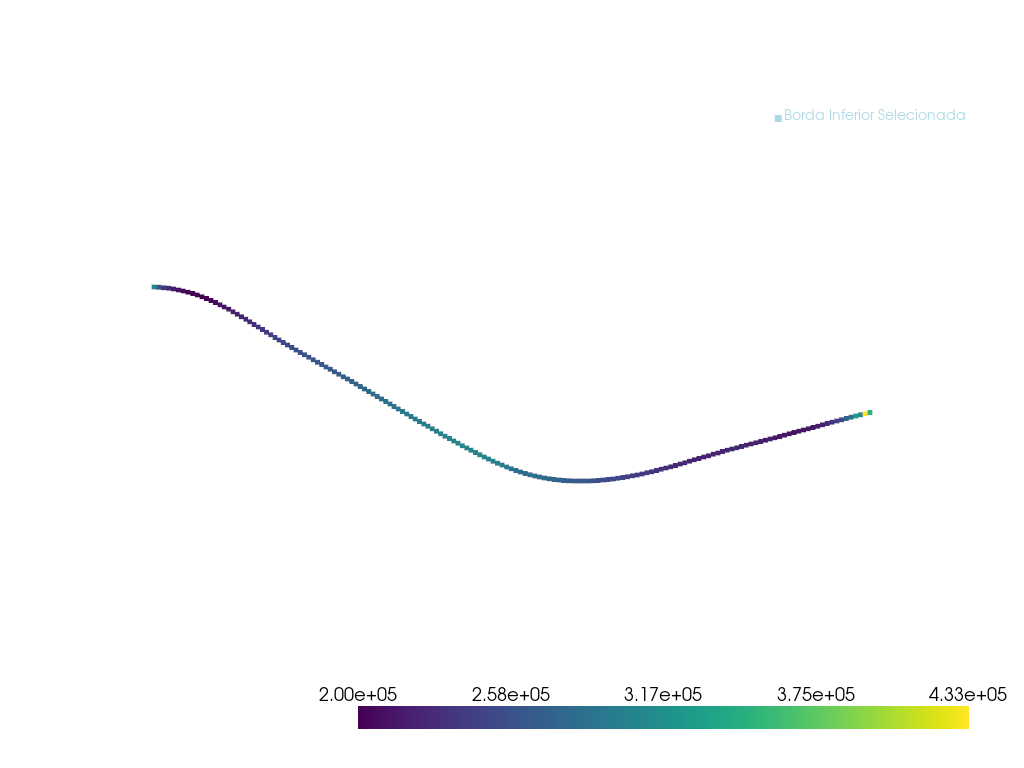

In [491]:
plotter = pv.Plotter()

nozzle_wall_indexes = indices_A
nozzle_wall = fluid.points[nozzle_wall_indexes, :]

plotter.add_points(
    nozzle_wall,
    scalars=fluid['Heat_Flux'][nozzle_wall_indexes],
    label='Borda Inferior Selecionada',
    #render_points_as_spheres=True,
    #point_size=20,
    #stitle='Temperature (K)'  # Título da barra de cores
)

plotter.view_xy()
plotter.add_legend()
plotter.show()

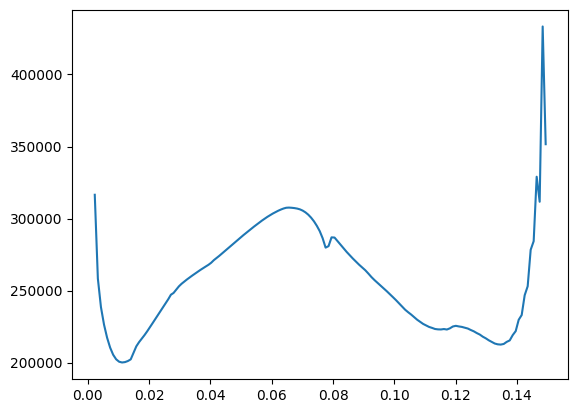

In [492]:
import matplotlib.pyplot as plt 

indices_ordenados = np.argsort(nozzle_wall[:, 0])
plt.plot(nozzle_wall[indices_ordenados,0][:],fluid['Heat_Flux'][nozzle_wall_indexes][indices_ordenados][:], label='Heat Flux')

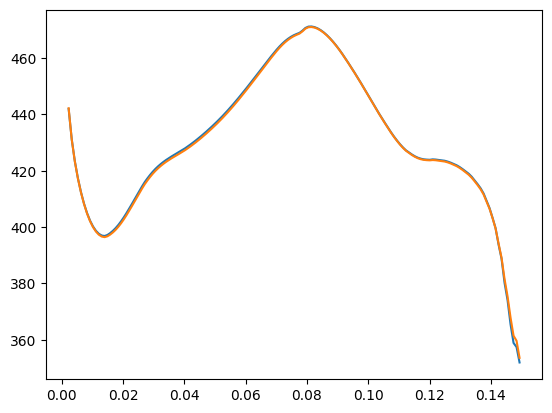

In [493]:
import matplotlib.pyplot as plt 

indices_ordenados = np.argsort(nozzle_wall[:, 0])
plt.plot(nozzle_wall[indices_ordenados,0][:],fluid['Temperature'][nozzle_wall_indexes][indices_ordenados][:], label='Heat Flux')
plt.plot(nozzle_wall[indices_ordenados,0],lower_scalars, label='lower scalars')
#plt.plot(nozzle_wall[indices_ordenados,0],upper_scalars, label='upper scalars')

In [494]:
data = {
    'nozzle_wall': nozzle_wall,
    'fluid': fluid,
    'solid': solid,
    'lower_points': lower_points,
    'upper_points': upper_points,
    'lower_scalars': lower_scalars,
    'upper_scalars': upper_scalars,
    'nozzle_wall_indexes': nozzle_wall_indexes
}

In [495]:
fluid.points

pyvista_ndarray([[0.00124464, 0.        , 0.        ],
                 [0.1503533 , 0.        , 0.        ],
                 [0.00124464, 0.06280238, 0.        ],
                 ...,
                 [0.1494093 , 0.00543202, 0.        ],
                 [0.1494113 , 0.00370307, 0.        ],
                 [0.1494134 , 0.00188705, 0.        ]])

In [496]:
fluid.surface_indices().shape

(25600,)

In [497]:
dir(fluid)

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ConvertFaceStreamPointIds',
 'CopyAttributes',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DecomposeAPolyhedronCell',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'EditableOff',
 'EditableOn',
 'ExtendedNew',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CE

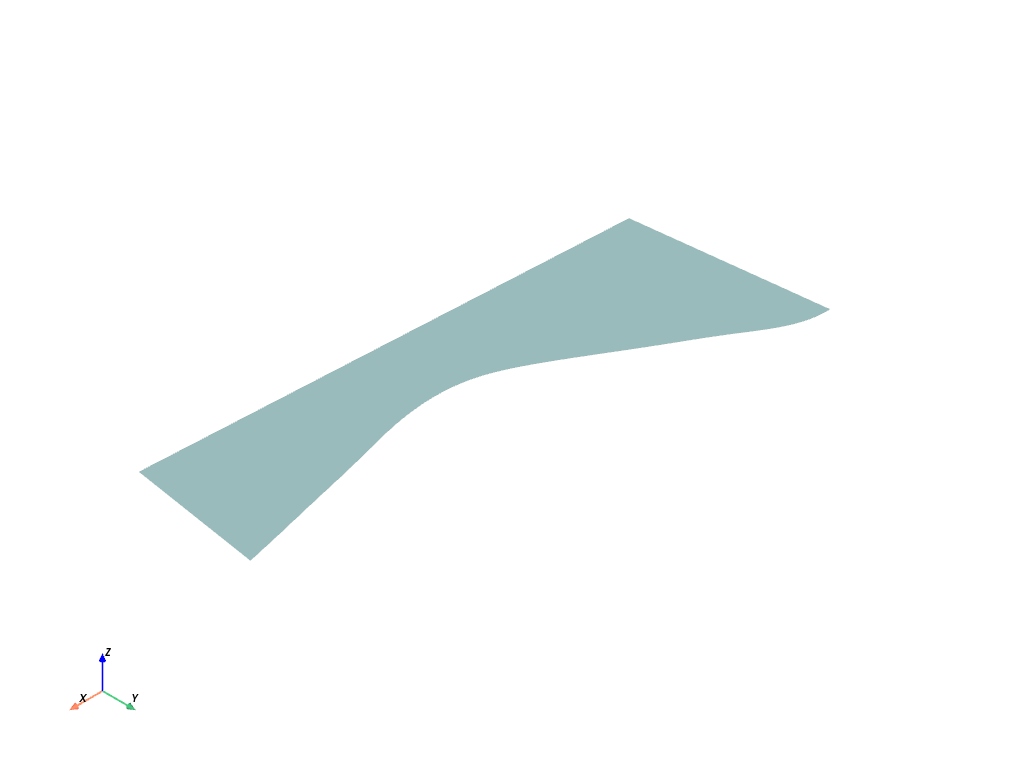

In [498]:
fluid.cells

mesh = pv.PolyData(fluid.points, fluid.cells)
mesh.plot()

In [499]:
fluid.cells_dict

{np.uint8(9): array([[    2,   162,   636,   478],
        [  162,   163,   637,   636],
        [  163,   164,   638,   637],
        ...,
        [25597, 25598,   476,   475],
        [25598, 25599,   477,   476],
        [25599,   161,     1,   477]])}